# Hierarchical Clustering

This notebook demonstrates Hierarchical Clustering using scipy and sklearn libraries. The algorithm creates a tree-like structure (dendrogram) showing how clusters are progressively merged.

**Objective**: Build a hierarchy of clusters and visualize the dendrogram to understand data structure and relationships.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Setting style
sns.set_style("whitegrid")
np.random.seed(42)

## Loading and Preprocessing Data

Loading the Iris dataset and standardizing features to ensure all dimensions contribute equally to distance calculations.

In [2]:
# Loading Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Standardizing features for better distance calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating DataFrame for better visualization
df = pd.DataFrame(X_scaled, columns=feature_names)

print(f"Data shape: {X_scaled.shape}")
print(f"Features: {feature_names}")
print(f"\nFirst 5 rows:\n{df.head()}")

Data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


## Building Hierarchical Clustering

Using scipy's linkage function to perform hierarchical clustering with different linkage methods. Ward linkage minimizes within-cluster variance and is commonly used.

In [3]:
# Performing hierarchical clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
linkage_results = {}

for method in linkage_methods:
    Z = linkage(X_scaled, method=method)
    linkage_results[method] = Z
    print(f"Linkage matrix computed for '{method}' method")

# Using Ward method for detailed analysis
Z_ward = linkage_results['ward']
print(f"\nLinkage matrix shape: {Z_ward.shape}")

Linkage matrix computed for 'ward' method
Linkage matrix computed for 'complete' method
Linkage matrix computed for 'average' method
Linkage matrix computed for 'single' method

Linkage matrix shape: (149, 4)


## Visualizing Dendrograms

Plotting dendrograms for different linkage methods to understand cluster formation patterns. The height indicates the distance at which clusters merge.

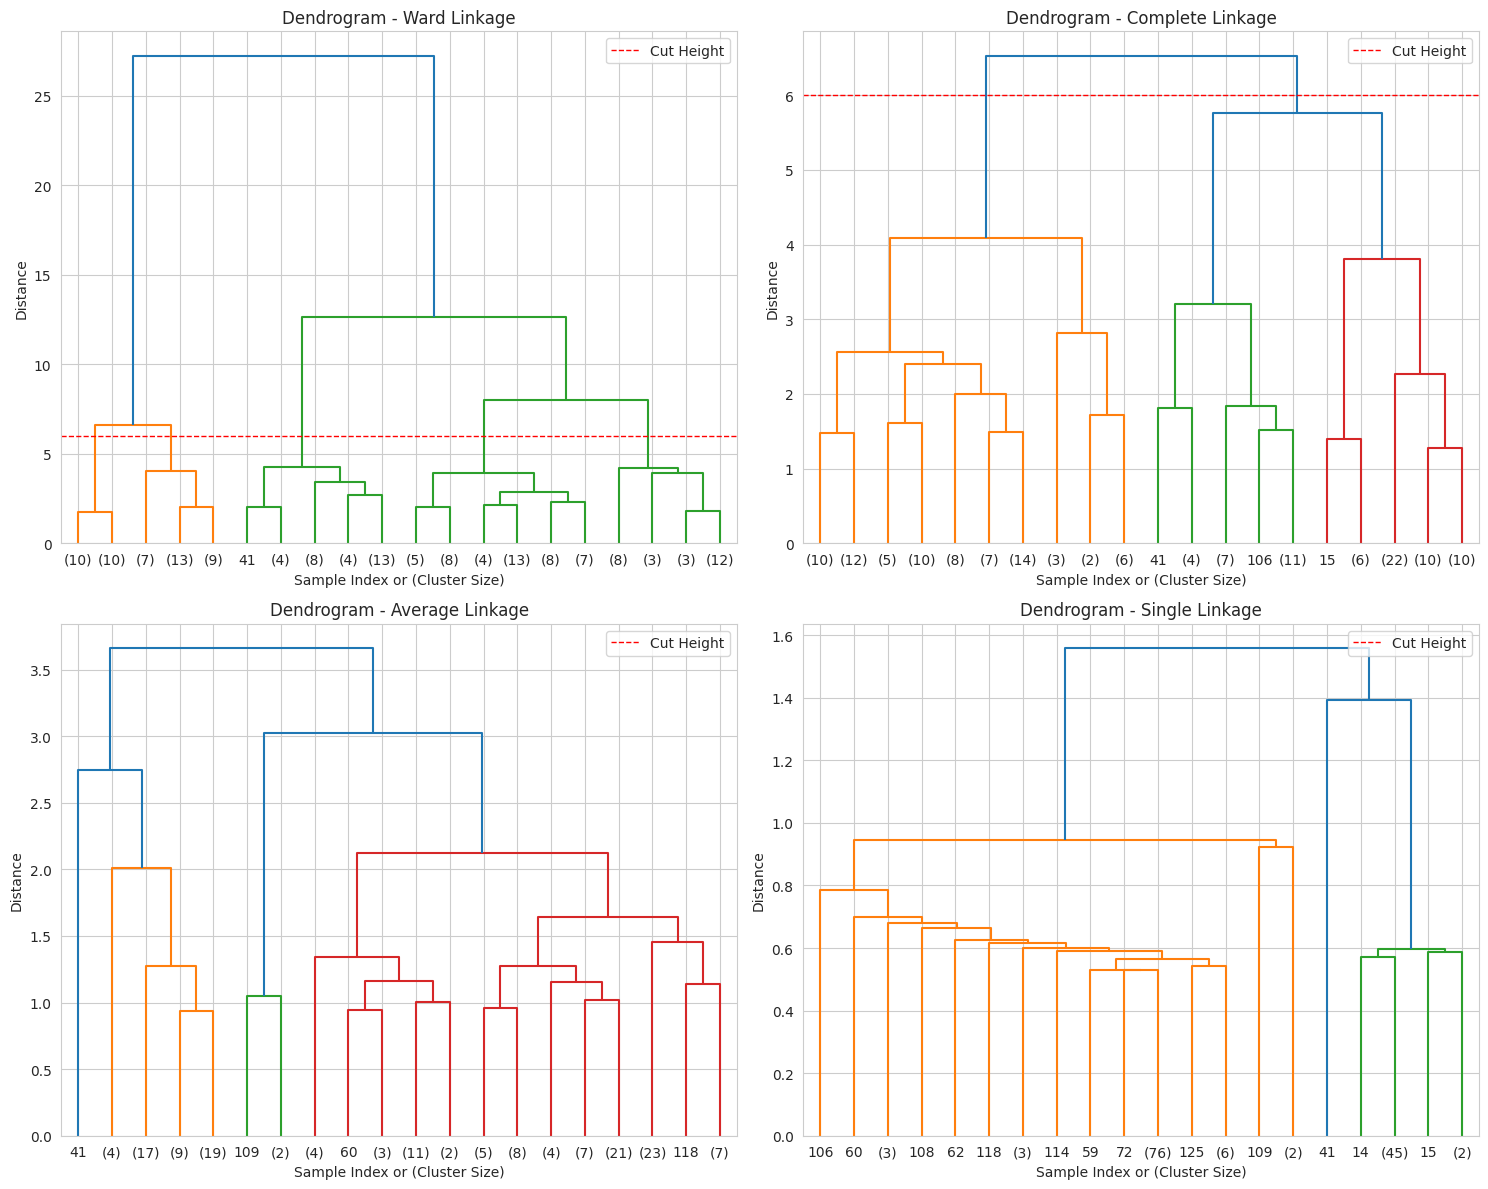

In [4]:
# Plotting dendrograms for different linkage methods
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, method in enumerate(linkage_methods):
    dendrogram(linkage_results[method], ax=axes[idx],
               truncate_mode='lastp', p=20, leaf_font_size=10)
    axes[idx].set_title(f'Dendrogram - {method.capitalize()} Linkage', fontsize=12)
    axes[idx].set_xlabel('Sample Index or (Cluster Size)')
    axes[idx].set_ylabel('Distance')
    axes[idx].axhline(y=6, color='r', linestyle='--', linewidth=1, label='Cut Height')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## Extracting Clusters and Evaluation

Cutting the dendrogram at an optimal height to form clusters and evaluating using sklearn's AgglomerativeClustering for final labels.

In [5]:
# Cutting dendrogram to get 3 clusters using fcluster
n_clusters = 3
labels_scipy = fcluster(Z_ward, n_clusters, criterion='maxclust')

# Using sklearn's AgglomerativeClustering for comparison
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_sklearn = agg_clustering.fit_predict(X_scaled)

# Calculating Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels_sklearn)

print(f"\n{'='*50}")
print(f"Hierarchical Clustering Results (k={n_clusters})")
print(f"{'='*50}")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Cluster distribution: {np.bincount(labels_sklearn)}")


Hierarchical Clustering Results (k=3)
Silhouette Score: 0.447
Cluster distribution: [71 49 30]


## Visualization of Clusters

Visualizing the final clusters in 2D using the first two principal features. Comparing with true Iris species labels.

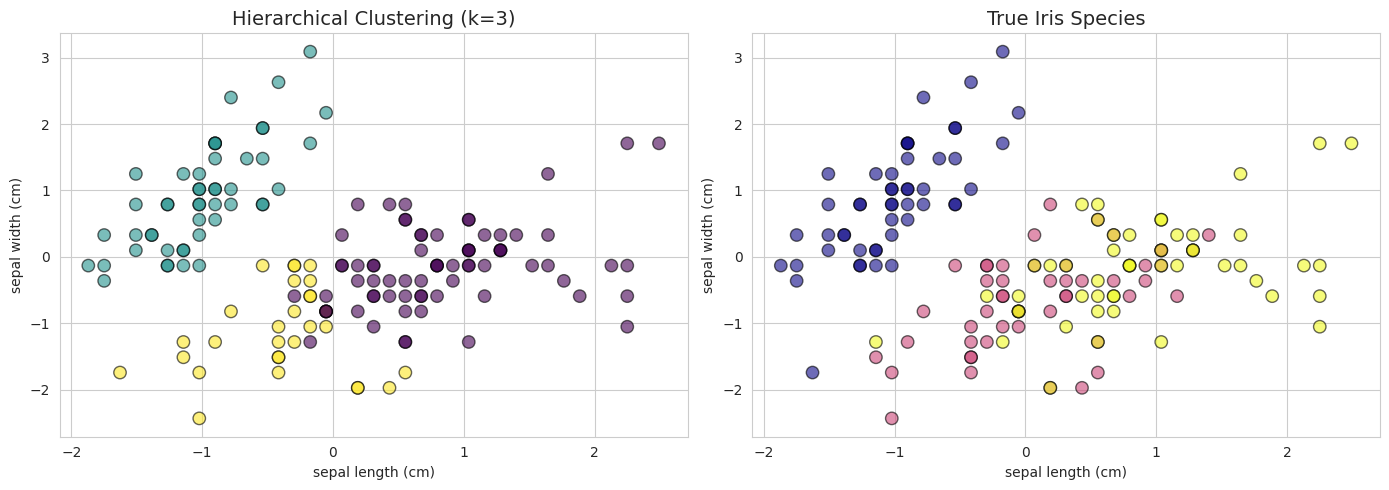


Clustering complete! Silhouette Score: 0.447


In [6]:
# Visualizing clusters using first two features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hierarchical clustering results
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_sklearn,
                cmap='viridis', alpha=0.6, edgecolors='k', s=80)
axes[0].set_title(f'Hierarchical Clustering (k={n_clusters})', fontsize=14)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])

# True labels
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris.target,
                cmap='plasma', alpha=0.6, edgecolors='k', s=80)
axes[1].set_title('True Iris Species', fontsize=14)
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])

plt.tight_layout()
plt.show()

print(f"\nClustering complete! Silhouette Score: {silhouette_avg:.3f}")